In [2]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67430e-11  # gravitational constant

In [3]:
class Body:
    def __init__(self, name, mass, position, velocity):
        self.name = name
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)

In [27]:
# Force calculator class with three children, brute force, barnes-hut, and fast multipole
class ForceCalculator:
    def compute_accelerations(self, bodies):
        pass
    
# Naively compute all O(n^2) force pairs
class DirectForceCalculator(ForceCalculator):
    
    def compute_accelerations(self, bodies):
        N = len(bodies)
        positions = np.array([b.position for b in bodies])
        masses = np.array([b.mass for b in bodies])
        accelerations = np.zeros((N, 3))
        
        for i in range(N):
            for j in range(N):
                if i == j:
                    continue
                r = positions[i] - positions[j]
                a = (G * masses[j] / np.linalg.norm(r)**3) * r
                accelerations[i] += a
        return accelerations

class BarnesHutForceCalculator(ForceCalculator):
    def compute_accelerations(self, bodies):
        return 0

class FastMultipoleForceCalculator(ForceCalculator):
    def compute_accelerations(self, bodies):
        return 0

In [31]:
# Integrator class with two children, RK4 and Leapfrog (symplectic)
class Integrator():
    def step(self, bodies, h): 
        pass
    
class RK4Integrator(Integrator):
    def __init__(self, force_calculator):
        self.force_calculator = force_calculator

    def step(self, bodies, dt):
        # concatenate positions and velocities of bodies
        p0 = np.array([b.position for b in bodies])
        v0 = np.array([b.velocity for b in bodies])

        def derivatives(positions, velocities):
            # Temporarily update positions to compute accelerations
            for i, b in enumerate(bodies):
                b.position = positions[i]
                b.velocity = velocities[i]
            accelerations = self.force_calculator.compute_accelerations(bodies)
            return velocities, accelerations

        k1v, k1a = derivatives(p0, v0)
        k2v, k2a = derivatives(p0 + 0.5 * dt * k1v, v0 + 0.5 * dt * k1a)
        k3v, k3a = derivatives(p0 + 0.5 * dt * k2v, v0 + 0.5 * dt * k2a)
        k4v, k4a = derivatives(p0 + dt * k3v, v0 + dt * k3a)

        new_positions = p0 + (dt/6)*(k1v + 2*k2v + 2*k3v + k4v)
        new_velocities = v0 + (dt/6)*(k1a + 2*k2a + 2*k3a + k4a)

        for i, b in enumerate(bodies):
            b.position = new_positions[i]
            b.velocity = new_velocities[i]

class LeapfrogIntegrator(Integrator):
    def __init__(self, force_calculator):
        self.force_calculator = force_calculator
    
    def step(self, bodies, dt):
        pass

In [54]:
# simulation
class NBodySimulation:
    def __init__(self, bodies, integrator, f_calc):
        self.bodies = bodies
        self.f_calc = DirectForceCalculator()
        self.integrator = RK4Integrator(self.f_calc)
    
    def plot():
        # plot something from self.bodies
        return 0

    def run(self, dt, steps):
        rs = []
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        
        for i in range(steps):
            self.integrator.step(self.bodies, dt)
            sun_pos = self.bodies[0].position
            earth_pos = self.bodies[1].position
            
            ax.scatter(sun_pos[0], sun_pos[1], sun_pos[2], marker="o")
            ax.scatter(earth_pos[0], earth_pos[1], earth_pos[2], marker="^")
        plt.show()

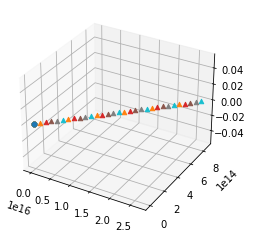

In [67]:
sun = Body("Sun", 1.98847e30, [0, 0, 0], [0, 0, 0])
earth = Body("Earth", 5.972e24, [149e9, 0, 0], [0, 30000, 0])
sim = NBodySimulation([sun, earth], "direct", "naive")
day = 60*60*24*30*365

traj = sim.run(day, 30)

#plot